## Implement the following classifiers in R
### 1. Decision Trees
### 2. Naive Bayes Classifiers
### 3. K-NN Classifiers
### 4. Support Vector Machines(SVM’s)

## Decision Tree

In [1]:
#install.packages("party")
#install.packages('caTools')
#install.packages('e1071')
#install.packages('caret')
library(caTools)



Warning message:
"package 'caTools' was built under R version 3.6.3"

In [2]:
library(party)

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"

In [3]:
input.dat = data.frame(iris)
head(input.dat)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
is.null(input.dat)

[1] FALSE

In [5]:
#Spliting the dataset in train and test dataset
split = sample.int(n=nrow(input.dat), size=round(.75*(nrow(input.dat))),replace=FALSE)
train_cl = input.dat[split,]
test_cl = input.dat[-split,]
dim(train_cl)


[1] 112   5

In [6]:
dim(test_cl)

[1] 38  5

In [7]:
# Create the tree.
output.tree=ctree(Species~. , data = train_cl)
summary(output.tree)

    Length      Class       Mode 
         1 BinaryTree         S4 

In [8]:
#Predicting the values for the test cases
y_predict=predict(output.tree,test_cl)
y_predict


[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor virginica  virginica  virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica 
Levels: setosa versicolor virginica

In [9]:
#Evaluating the model
table_mat=table(y_predict,test_cl$Species)
table_mat

            
y_predict    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          0        11

In [10]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [11]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [12]:
#Creating the confusion matrix
confusionMatrix(table_mat)

Confusion Matrix and Statistics

            
y_predict    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          0        11

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9075, 1)
    No Information Rate : 0.3947     
    P-Value [Acc > NIR] : 4.568e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3947            0.3158   

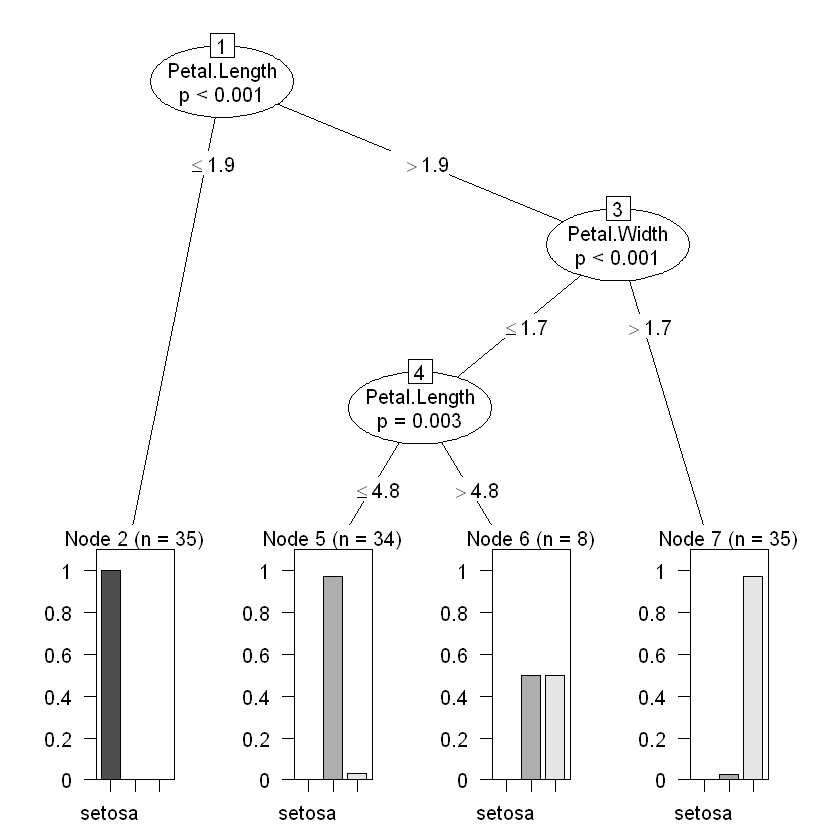

In [13]:
#Plotting the tree
plot(output.tree)

## Naïve Bayes Classifier 

In [14]:
#Load the dataset
data=data.frame(read.csv("C:\\Users\\DELL\\OneDrive\\bank-full.csv",header =TRUE, sep = ';'))
head(data)

Warning message in file(file, "rt"):
"cannot open file 'C:\Users\DELL\OneDrive\bank-full.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
is.null(data)

In [ ]:
#Spliting the dataset in train and test dataset
split = sample.int(n=nrow(data), size=round(.90*(nrow(data))),replace=FALSE)
train_cl = data[split,]
test_cl = data[-split,]
dim(train_cl)


In [ ]:
dim(test_cl)

In [ ]:
#Creating the model
nB=naiveBayes(y~. , data = train_cl)
summary(nB)

In [15]:
#Predicting the values for the test cases
y_predict=predict(nB,test_cl)
y_predict

ERROR: Error in predict(nB, test_cl): object 'nB' not found


In [16]:
#Evaluating the model
table_mat=table(y_predict,test_cl$y)
table_mat

ERROR: Error in table(y_predict, test_cl$y): all arguments must have the same length


In [17]:
#Creating the confusion matrix
confusionMatrix(table_mat)

Confusion Matrix and Statistics

            
y_predict    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          0        11

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9075, 1)
    No Information Rate : 0.3947     
    P-Value [Acc > NIR] : 4.568e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3947            0.3158   

## KNN Classifier

In [18]:
df = data.frame(iris)
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [19]:
is.null(df)

[1] FALSE

In [20]:
library(caret)
df$Species=as.numeric(as.factor(df$Species))
split = sample.int(n=nrow(df), size=round(.75*(nrow(df))),replace=FALSE)
train_cl = df[split,]
test_cl = df[-split,]
dim(train_cl)

[1] 112   5

In [21]:
dim(test_cl)

[1] 38  5

In [22]:
kn= knn(train = train_cl,test = test_cl, cl = train_cl$Species, k =5)
kn

ERROR: Error in knn(train = train_cl, test = test_cl, cl = train_cl$Species, : could not find function "knn"


In [23]:
summary(kn)

ERROR: Error in summary(kn): object 'kn' not found


In [24]:
table_mat=table(kn,test_cl$Species)
table_mat


ERROR: Error in table(kn, test_cl$Species): object 'kn' not found


In [25]:
confusionMatrix(table_mat)

Confusion Matrix and Statistics

            
y_predict    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          0        11

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9075, 1)
    No Information Rate : 0.3947     
    P-Value [Acc > NIR] : 4.568e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3947            0.3158   

## SVM Classifier


In [26]:
data = data.frame(iris)
head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [27]:
is.null(data)

[1] FALSE

In [28]:
split = sample.int(n=nrow(data), size=round(.90*(nrow(data))),replace=FALSE)
train_cl = data[split,]
test_cl = data[-split,]
dim(train_cl)


[1] 135   5

In [29]:
dim(test_cl)

[1] 15  5

In [30]:
# Create the SVM model.
sv=svm(formula=Species~. , data = train_cl)
summary(sv)


Call:
svm(formula = Species ~ ., data = train_cl)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  49

 ( 20 9 20 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [31]:
#Predicting the values for the test cases
y_predict=predict(sv,test_cl)
y_predict

12         31         38         47         48         52         58 
    setosa     setosa     setosa     setosa     setosa versicolor versicolor 
        72         78         85         99        118        119        126 
versicolor  virginica versicolor versicolor  virginica  virginica  virginica 
       149 
 virginica 
Levels: setosa versicolor virginica

In [32]:
#Evaluating the model
table_mat=table(y_predict,test_cl$Species)
table_mat

            
y_predict    setosa versicolor virginica
  setosa          5          0         0
  versicolor      0          5         0
  virginica       0          1         4

# Creating the confusion matrix


In [33]:
confusionMatrix(table_mat)

Confusion Matrix and Statistics

            
y_predict    setosa versicolor virginica
  setosa          5          0         0
  versicolor      0          5         0
  virginica       0          1         4

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.6805, 0.9983)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : 2.523e-05       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8333           1.0000
Specificity                 1.0000            1.0000           0.9091
Pos Pred Value              1.0000            1.0000           0.8000
Neg Pred Value              1.0000            0.9000           1.0000
Prevalence